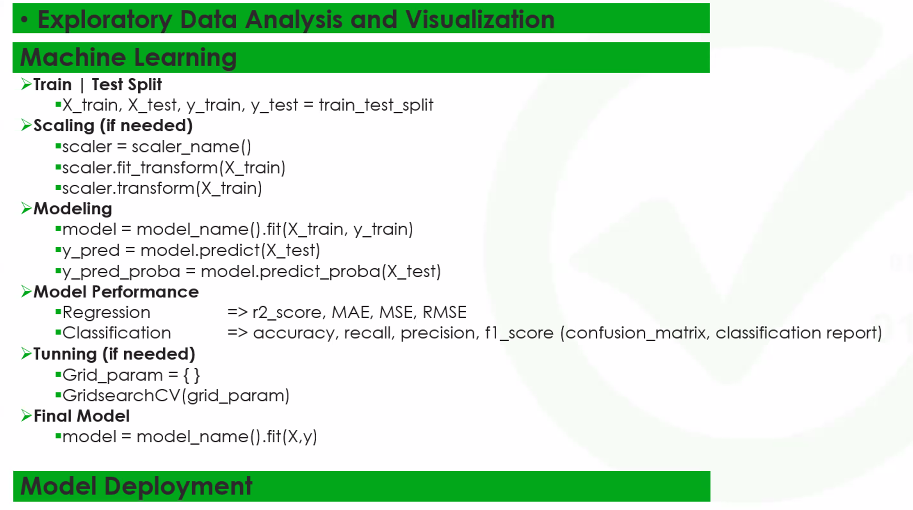

## Import Library

## Read Data Set 
Datanın tanınmasına yönelik tüm kodlar burada olacak visualization dahil.

# Model

## Splitting the dataset into X (independent variables) and y (dependent variable)

X = Features

y = Target

 ## Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling the Data (train datasına fit yap test datasında ve train datasında transform yap)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

## Training the Model (Modeli Eğitmek)

In [ ]:
from sklearn.linear_model import LinearRegression ## Modeli import et buradaki linear regression isterseniz logistic reg de seçebilirdik.

In [ ]:
slr = LinearRegression()

In [ ]:
slr.fit(X_train, y_train)

## Predicting Test Data (Tahmin Almak)

In [ ]:
y_train_pred = slr.predict(X_train)

y_pred = slr.predict(X_test)

## Evaluating the Model (Modeli değerlendir (R2, MAE, MSE, RMSE))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name): ## BİZ OLUŞTURDUK
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

## Residuals Chek (Normal dağılım varsa bir patern yoksa o zaman modelim doğrusaldır). Modelin doğrusal olduğunun kontrolü için)

In [ ]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## Prediction Error for LinearRegression (tahmin hatalarının yellow brick kütüphanesi ile tespiti)

In [ ]:
from yellowbrick.regressor import PredictionError

model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show(); 

## Multilinearity kontrolü

In [ ]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation2)

## Cross Validate (Çapraz doğrulama r2, MAE, MSE, RMSE değerlerim gerçekten CV sonrası aldığım değerle uyumlu mu?)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

## Final Model tüm datayı verip skor alma

In [ ]:
final_model = LinearRegression()
final_model.fit(X,y)

## Prediction (yeni değerler ile)